In [22]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
from matplotlib import rc
from scipy.signal import find_peaks 
from cProfile import label
import scipy.interpolate as scint

In [23]:
def eq_constants(df):
    K_MnCl = df['MnCl+']/(df['Mn+2']*df['Cl-1'])
    K1_MnCl2 = df['MnCl2 (aq)']/(df['MnCl+']*df['Cl-1'])
    K2_MnCl2 = df['MnCl2 (aq)']/(df['Mn+2']*(df['Cl-1']**2))
    K1_MnCl3 = df['MnCl3-']/(df['MnCl2 (aq)']*df['Cl-1'])
    K2_MnCl3 = df['MnCl3-']/(df['MnCl+']*(df['Cl-1']**2))
    K3_MnCl3 = df['MnCl3-']/(df['Mn+2']*(df['Cl-1']**3))
    new_df_array = np.array([K_MnCl, K1_MnCl2, K2_MnCl2, K1_MnCl3, K2_MnCl3, K3_MnCl3])
    new_df = pd.DataFrame(new_df_array.T, index = df.index, columns = ['K MnCl+', 'K1 MnCl2', 'K2 MnCl2', 'K1 MnCl3-', 'K2 MnCl3-', 'K3 MnCl3-'])
    return new_df

In [24]:
SW_path = './seawater_wMn_corrected.CSV'
SW_model = pd.read_csv(SW_path, sep = ';', decimal = ',', index_col = 0)
SW_model = SW_model.drop(labels = [0.000, 8.200, 8.296, 13.0, 14.0], axis = 0)

small_path = './small_model_full.CSV'
small_model = pd.read_csv(small_path, sep = ';', decimal = ',', index_col = 0)

small_Cl1_path = './small_Cl_model1.CSV'
small_Cl_model1 = pd.read_csv(small_Cl1_path, sep = ';', decimal = ',', index_col = 0)
small_Cl_model1 = small_Cl_model1.drop(labels = ['pH'], axis = 1)
small_Cl_model1 = small_Cl_model1.drop(labels = [0.00001, 0.00005, 0.00010, 0.00050, 0.00100, 0.00500, 0.01000, 0.05000], 
                                       axis = 0)

large_Cl_path = './large_Cl_for_Keq.CSV'
large_Cl_model = pd.read_csv(large_Cl_path, sep = ';', decimal = ',', index_col = 0)

uvvis_path = './uvvis_ex3_for_Keq.CSV'
uvvis_ex3 = pd.read_csv(uvvis_path, sep = ';', decimal = ',', index_col = 0)

In [25]:
SW_Keq = eq_constants(SW_model)
small_Keq = eq_constants(small_model)
small_Cl1_Keq = eq_constants(small_Cl_model1)
large_Cl_Keq = eq_constants(large_Cl_model)
uvvis_Keq = eq_constants(uvvis_ex3)

In [26]:
display_labels = [r'K(MnCl$^{+}$)', r'K$_{1}$(MnCl$_{2}$)', r'K$_{2}$(MnCl$_{2}$)', r'K$_{1}$(MnCl$_{3}^{-}$)', 
                  r'K$_{2}$(MnCl$_{3}^{-}$)', r'K$_{3}$(MnCl$_{3}^{-}$)']

In [27]:
def make_subplots(axes, df, ydata, display_label, color, xlabel, ylabel):
    ax = axes
    ax.scatter(df.index.values, df[ydata], label = display_label, s = 10, color = color)
    ax.plot(df.index.values, df[ydata], lw = 1, label = None, color = color)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.xaxis.set_minor_locator(AutoMinorLocator())
    ax.yaxis.set_minor_locator(AutoMinorLocator())
    ax.tick_params(axis = 'both', which = 'major', direction = 'out', bottom = True, left = True)
    ax.tick_params(axis = 'both', which = 'minor', direction = 'out', width = 1, length = 2, bottom = True, left = True)
    ax.legend(frameon = False, fontsize = 8)

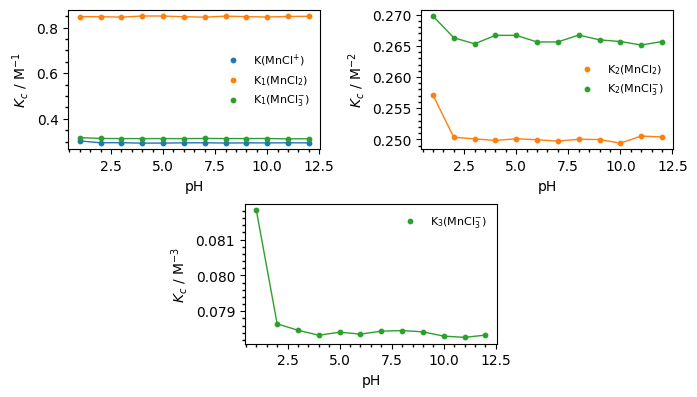

In [28]:
fig = plt.figure(figsize = (7, 4))
spec = mpl.gridspec.GridSpec(ncols=4, nrows=2)

ax1 = fig.add_subplot(spec[0,0:2]) 
ax2 = fig.add_subplot(spec[0,2:])
ax3 = fig.add_subplot(spec[1,1:3])

make_subplots(ax1, SW_Keq, 'K MnCl+', display_labels[0], 'tab:blue', 'pH', r'$K_{c}$ / M$^{-1}}$')
make_subplots(ax1, SW_Keq, 'K1 MnCl2', display_labels[1], 'tab:orange', 'pH', r'$K_{c}$ / M$^{-1}}$')
make_subplots(ax1, SW_Keq, 'K1 MnCl3-', display_labels[3], 'tab:green', 'pH', r'$K_{c}$ / M$^{-1}}$')

make_subplots(ax2, SW_Keq, 'K2 MnCl2', display_labels[2], 'tab:orange', 'pH', r'$K_{c}$ / M$^{-2}}$')
make_subplots(ax2, SW_Keq, 'K2 MnCl3-', display_labels[4], 'tab:green', 'pH', r'$K_{c}$ / M$^{-2}}$')

make_subplots(ax3, SW_Keq, 'K3 MnCl3-', display_labels[5], 'tab:green', 'pH', r'$K_{c}$ / M$^{-3}}$')

plt.tight_layout(pad=0.8)
plt.savefig('SW_Keq.png', dpi=150)
plt.show()

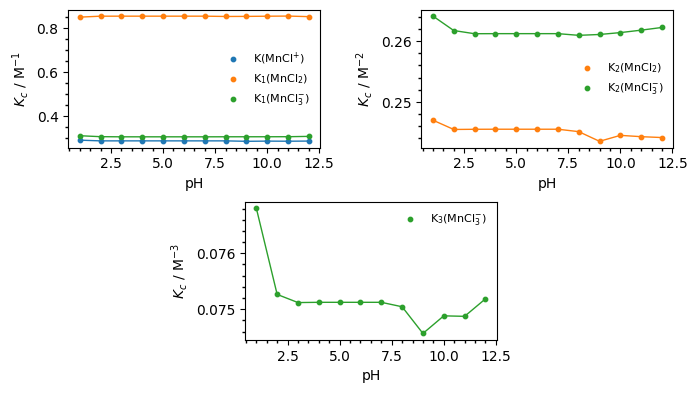

In [29]:
fig = plt.figure(figsize = (7, 4))
spec = mpl.gridspec.GridSpec(ncols=4, nrows=2)

ax1 = fig.add_subplot(spec[0,0:2]) 
ax2 = fig.add_subplot(spec[0,2:])
ax3 = fig.add_subplot(spec[1,1:3])

make_subplots(ax1, small_Keq, 'K MnCl+', display_labels[0], 'tab:blue', 'pH', r'$K_{c}$ / M$^{-1}}$')
make_subplots(ax1, small_Keq, 'K1 MnCl2', display_labels[1], 'tab:orange', 'pH', r'$K_{c}$ / M$^{-1}}$')
make_subplots(ax1, small_Keq, 'K1 MnCl3-', display_labels[3], 'tab:green', 'pH', r'$K_{c}$ / M$^{-1}}$')

make_subplots(ax2, small_Keq, 'K2 MnCl2', display_labels[2], 'tab:orange', 'pH', r'$K_{c}$ / M$^{-2}}$')
make_subplots(ax2, small_Keq, 'K2 MnCl3-', display_labels[4], 'tab:green', 'pH', r'$K_{c}$ / M$^{-2}}$')

make_subplots(ax3, small_Keq, 'K3 MnCl3-', display_labels[5], 'tab:green', 'pH', r'$K_{c}$ / M$^{-3}}$')

plt.tight_layout(pad=0.8)
plt.savefig('small_Keq.png', dpi=150)
plt.show()

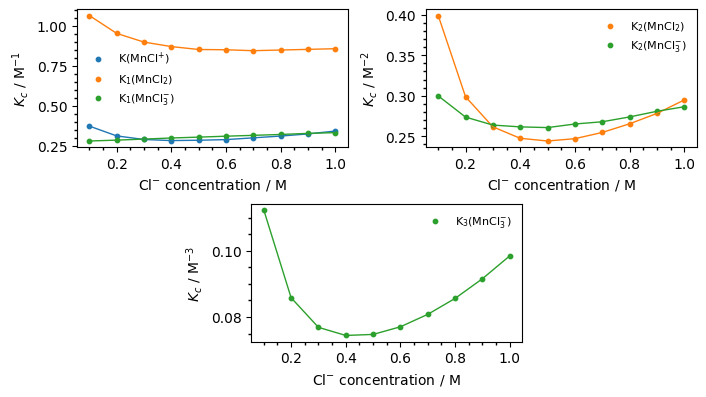

In [30]:
fig = plt.figure(figsize = (7, 4))
spec = mpl.gridspec.GridSpec(ncols=4, nrows=2)

ax1 = fig.add_subplot(spec[0,0:2]) 
ax2 = fig.add_subplot(spec[0,2:])
ax3 = fig.add_subplot(spec[1,1:3])

make_subplots(ax1, small_Cl1_Keq, 'K MnCl+', display_labels[0], 'tab:blue', r'Cl$^{-}$ concentration / M', r'$K_{c}$ / M$^{-1}}$')
make_subplots(ax1, small_Cl1_Keq, 'K1 MnCl2', display_labels[1], 'tab:orange', r'Cl$^{-}$ concentration / M', r'$K_{c}$ / M$^{-1}}$')
make_subplots(ax1, small_Cl1_Keq, 'K1 MnCl3-', display_labels[3], 'tab:green', r'Cl$^{-}$ concentration / M', r'$K_{c}$ / M$^{-1}}$')

make_subplots(ax2, small_Cl1_Keq, 'K2 MnCl2', display_labels[2], 'tab:orange', r'Cl$^{-}$ concentration / M', r'$K_{c}$ / M$^{-2}}$')
make_subplots(ax2, small_Cl1_Keq, 'K2 MnCl3-', display_labels[4], 'tab:green', r'Cl$^{-}$ concentration / M', r'$K_{c}$ / M$^{-2}}$')

make_subplots(ax3, small_Cl1_Keq, 'K3 MnCl3-', display_labels[5], 'tab:green', r'Cl$^{-}$ concentration / M', r'$K_{c}$ / M$^{-3}}$')

plt.tight_layout(pad=0.8)
plt.savefig('small_Cl1_Keq.png', dpi=150)
plt.show()

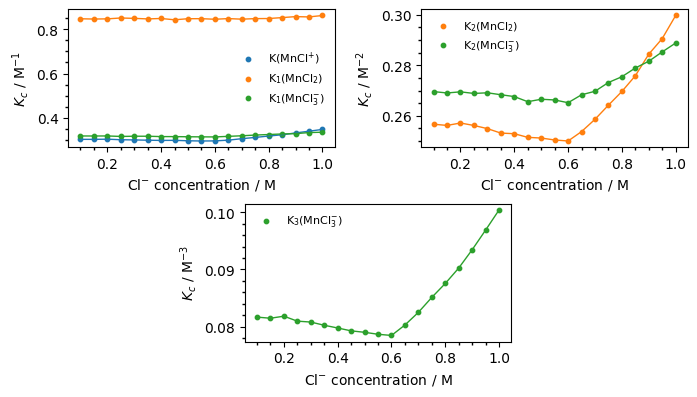

In [31]:
fig = plt.figure(figsize = (7, 4))
spec = mpl.gridspec.GridSpec(ncols=4, nrows=2)

ax1 = fig.add_subplot(spec[0,0:2]) 
ax2 = fig.add_subplot(spec[0,2:])
ax3 = fig.add_subplot(spec[1,1:3])

make_subplots(ax1, large_Cl_Keq, 'K MnCl+', display_labels[0], 'tab:blue', r'Cl$^{-}$ concentration / M', r'$K_{c}$ / M$^{-1}}$')
make_subplots(ax1, large_Cl_Keq, 'K1 MnCl2', display_labels[1], 'tab:orange', r'Cl$^{-}$ concentration / M', r'$K_{c}$ / M$^{-1}}$')
make_subplots(ax1, large_Cl_Keq, 'K1 MnCl3-', display_labels[3], 'tab:green', r'Cl$^{-}$ concentration / M', r'$K_{c}$ / M$^{-1}}$')

make_subplots(ax2, large_Cl_Keq, 'K2 MnCl2', display_labels[2], 'tab:orange', r'Cl$^{-}$ concentration / M', r'$K_{c}$ / M$^{-2}}$')
make_subplots(ax2, large_Cl_Keq, 'K2 MnCl3-', display_labels[4], 'tab:green', r'Cl$^{-}$ concentration / M', r'$K_{c}$ / M$^{-2}}$')

make_subplots(ax3, large_Cl_Keq, 'K3 MnCl3-', display_labels[5], 'tab:green', r'Cl$^{-}$ concentration / M', r'$K_{c}$ / M$^{-3}}$')

plt.tight_layout(pad=0.8)
plt.savefig('large_Cl_Keq.png', dpi=150)
plt.show()

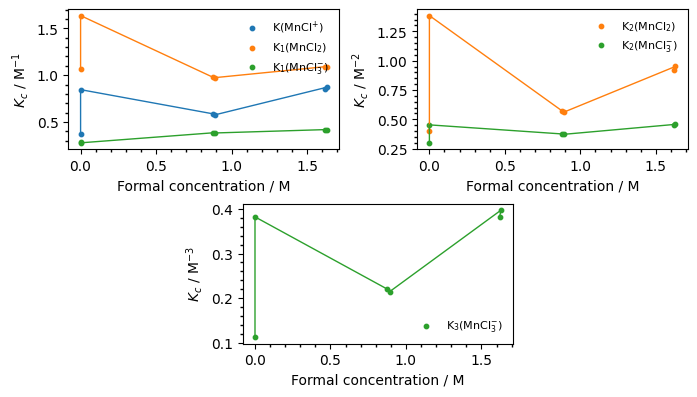

In [32]:
fig = plt.figure(figsize = (7, 4))
spec = mpl.gridspec.GridSpec(ncols=4, nrows=2)

ax1 = fig.add_subplot(spec[0,0:2]) 
ax2 = fig.add_subplot(spec[0,2:])
ax3 = fig.add_subplot(spec[1,1:3])

make_subplots(ax1, uvvis_Keq, 'K MnCl+', display_labels[0], 'tab:blue', 'Formal concentration / M', r'$K_{c}$ / M$^{-1}}$')
make_subplots(ax1, uvvis_Keq, 'K1 MnCl2', display_labels[1], 'tab:orange', 'Formal concentration / M', r'$K_{c}$ / M$^{-1}}$')
make_subplots(ax1, uvvis_Keq, 'K1 MnCl3-', display_labels[3], 'tab:green', 'Formal concentration / M', r'$K_{c}$ / M$^{-1}}$')

make_subplots(ax2, uvvis_Keq, 'K2 MnCl2', display_labels[2], 'tab:orange', 'Formal concentration / M', r'$K_{c}$ / M$^{-2}}$')
make_subplots(ax2, uvvis_Keq, 'K2 MnCl3-', display_labels[4], 'tab:green', 'Formal concentration / M', r'$K_{c}$ / M$^{-2}}$')

make_subplots(ax3, uvvis_Keq, 'K3 MnCl3-', display_labels[5], 'tab:green', 'Formal concentration / M', r'$K_{c}$ / M$^{-3}}$')

plt.tight_layout(pad=0.8)
plt.savefig('uvvis_Keq.png', dpi=150)
plt.show()